# Import libraries

In [ ]:
import pandas as pd
import numpy as np 
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [ ]:
## load dataset
url =  'https://raw.githubusercontent.com/shivckr/Dataset/master/Amazon_Alexa.tsv'
data = pd.read_csv(url, delimiter='\t' )

# About dataset

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3150 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


No null values 

In [ ]:
data.head()

,rating,date,variation,verified_reviews,feedback
0,5,2018-07-31,Charcoal Fabric,Love my Echo!,1
1,5,2018-07-31,Charcoal Fabric,Loved it!,1
2,4,2018-07-31,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,2018-07-31,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,2018-07-31,Charcoal Fabric,Music,1


In [ ]:
# change the date format 
data.date = pd.to_datetime(data.date)

In [ ]:
# feedback class 
data.variation.unique()

array(['Charcoal Fabric ', 'Walnut Finish ', 'Heather Gray Fabric ',
       'Sandstone Fabric ', 'Oak Finish ', 'Black', 'White',
       'Black  Spot', 'White  Spot', 'Black  Show', 'White  Show',
       'Black  Plus', 'White  Plus', 'Configuration: Fire TV Stick',
       'Black  Dot', 'White  Dot'], dtype=object)

There are 16 amazon alexa products

In [ ]:
data.date.describe()

count                    3150
unique                     77
top       2018-07-30 00:00:00
freq                     1603
first     2018-05-16 00:00:00
last      2018-07-31 00:00:00
Name: date, dtype: object

In [ ]:
from datetime import date
print(f'Reviews collected overs {( date(2018,7,31)-date(2018,5,16)).days} days ')

Reviews collected overs 76 days 


Feedback is collected over 76 days 

# Visualize data

In [ ]:
positive_feedback = data[data.feedback==1]
positive_feedback.count()

rating              2893
date                2893
variation           2893
verified_reviews    2893
feedback            2893
dtype: int64

In [ ]:
negative_feedback = data[data['feedback']==0]
negative_feedback.count()

rating              257
date                257
variation           257
verified_reviews    257
feedback            257
dtype: int64

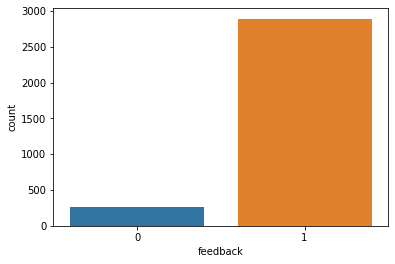

In [ ]:
sns.countplot(data.feedback, label = 'count')

Feedback colleted over 76 days are postivet mostly, hence unbalanced  

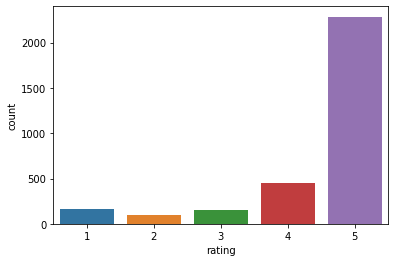

In [ ]:
sns.countplot(data.rating, label = 'count')

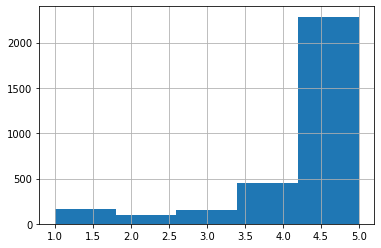

In [ ]:
data.rating.hist(bins = 5)

Based on above plot, 'rating' column can be grouped into : 'High, & 'Low' rating


In [ ]:
grp = data.groupby(data.variation).sum()
print (grp)

                              rating  feedback
variation                                     
Black                           1105       226
Black  Dot                      2298       480
Black  Plus                     1180       242
Black  Show                     1190       247
Black  Spot                     1039       209
Charcoal Fabric                 2034       418
Configuration: Fire TV Stick    1607       322
Heather Gray Fabric              737       155
Oak Finish                        68        14
Sandstone Fabric                 392        84
Walnut Finish                     44         9
White                            377        74
White  Dot                       814       172
White  Plus                      340        70
White  Show                      364        74
White  Spot                      470        97


Text(0, 0.5, ' Product Variations')

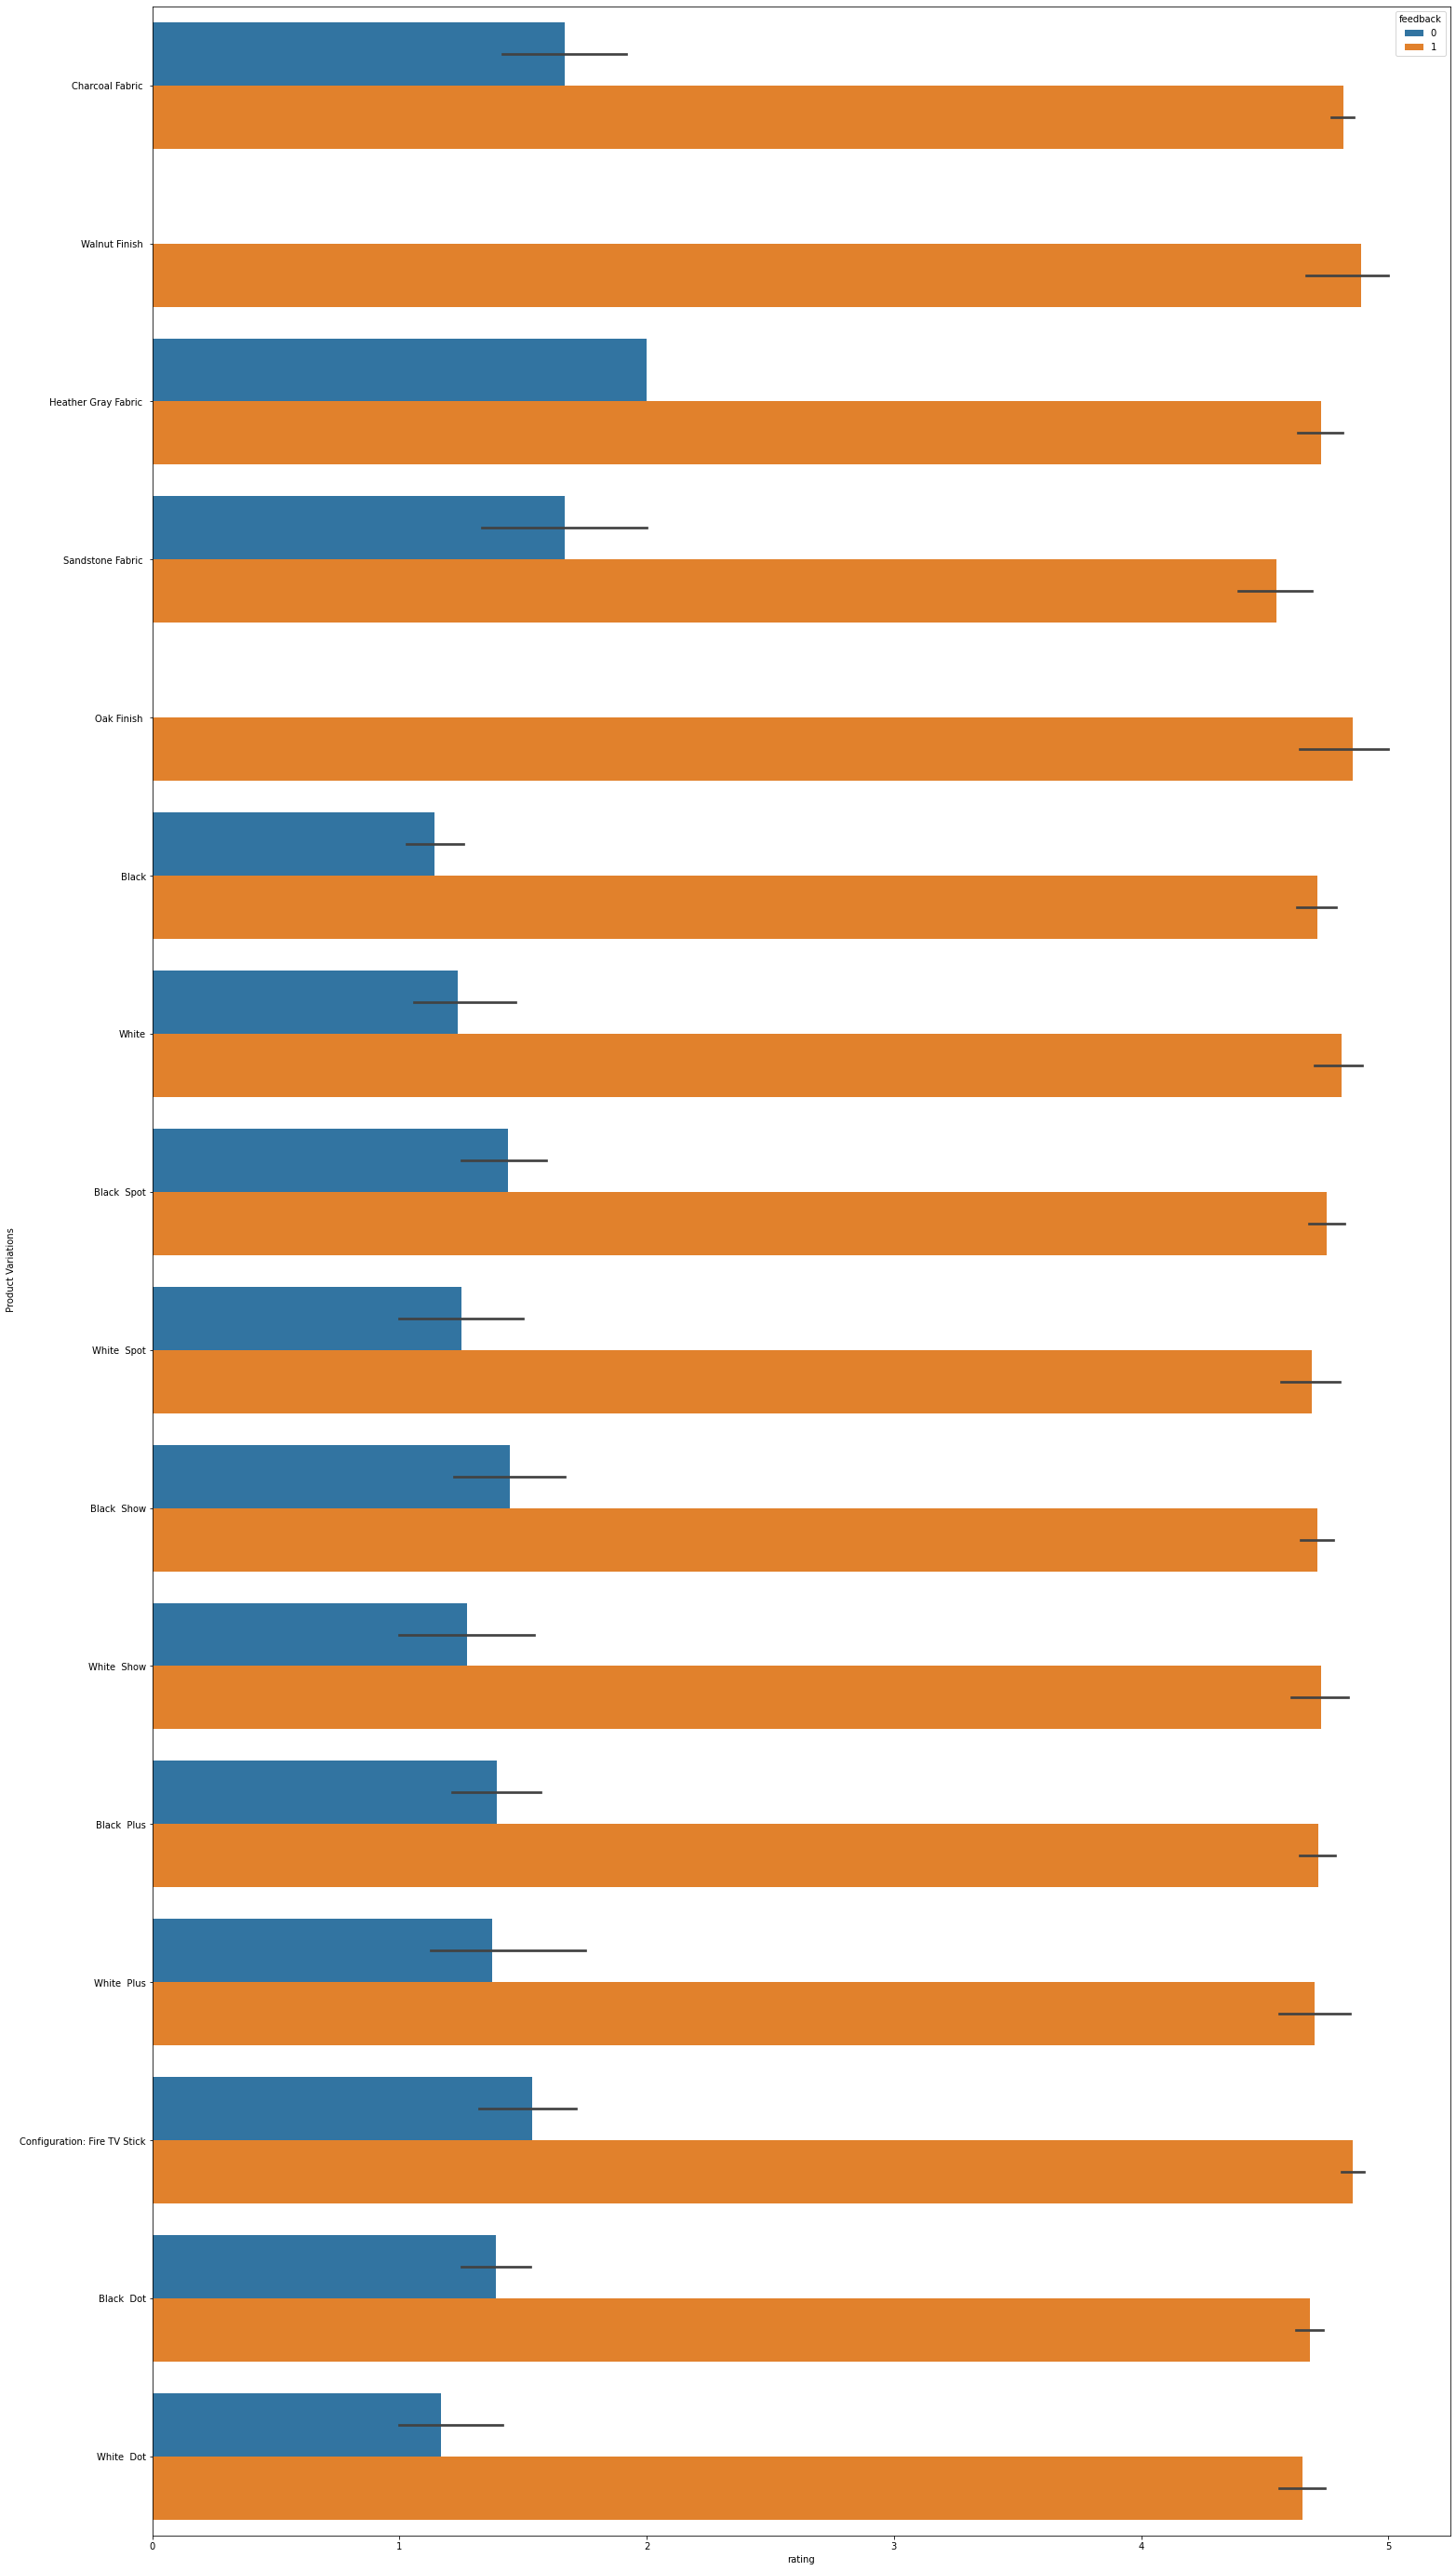

In [ ]:
plt.figure(figsize = (25, 50))
sns.barplot(x = 'rating',  y = 'variation', hue = 'feedback', data = data)
plt.ylabel(' Product Variations')

In [ ]:
data.variation.unique()

array(['Charcoal Fabric ', 'Walnut Finish ', 'Heather Gray Fabric ',
       'Sandstone Fabric ', 'Oak Finish ', 'Black', 'White',
       'Black  Spot', 'White  Spot', 'Black  Show', 'White  Show',
       'Black  Plus', 'White  Plus', 'Configuration: Fire TV Stick',
       'Black  Dot', 'White  Dot'], dtype=object)

observations:
 * 'Walnut Finish ', 'Oak Finish ', has not receievd negative feedback rating
 * 'Heather Gray Fabric ' has received most negative feedback ratings
 

# Clean up data

In [ ]:
# drop date, rating column 
data = data.drop(['date','rating'], axis = 1)

In [ ]:
# create dummy columns for 'variation' column 
variation_dummy = pd.get_dummies(data.variation, drop_first = True)


In [ ]:
# merge the dummy columns with actual data 
data = pd.concat([data, variation_dummy], axis = 1)

In [ ]:
data.shape

(3150, 18)

# Convert text into vector 
* How CountVectorizer works :-
* refer: [feature_exctraction](https://github.com/shivckr/Python-Jupyter_notebook/blob/master/Feature_extraction_example%20.ipynb
)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
vectorizer = CountVectorizer()
reviews_vector = vectorizer.fit_transform(data.verified_reviews)

In [ ]:
reviews_vector.shape

(3150, 4044)

In [ ]:
print(f'reviews_vectors: {vectorizer.get_feature_names()}')

reviews_vector: ['00', '000', '07', '10', '100', '100x', '11', '1100sf', '12', '129', '12am', '15', '150', '18', '19', '1964', '1990', '1gb', '1rst', '1st', '20', '200', '2000', '2017', '229', '23', '24', '25', '29', '2nd', '2package', '30', '300', '30pm', '34', '360', '39', '3rd', '3x', '3xs', '40', '45', '48', '4am', '4ghz', '4k', '4th', '50', '54', '5am', '5ghz', '5th', '600', '62', '672', '6th', '70', '75', '79', '80', '80s', '81', '83', '85', '88', '888', '8gb', '90', '91', '911', '99', '_specifically_', 'a1', 'a19', 'abay', 'abc', 'abd', 'abilities', 'ability', 'able', 'abode', 'about', 'above', 'absolutely', 'absolutly', 'ac', 'accent', 'acceptable', 'accepting', 'access', 'accessable', 'accessible', 'accessing', 'accessories', 'accesss', 'accident', 'accidentally', 'accompanying', 'accomplish', 'accomplished', 'according', 'accordingly', 'account', 'accounts', 'accuracy', 'accurate', 'accurately', 'accustom', 'acknowledge', 'acoustical', 'across', 'act', 'acting', 'action', 'ac

In [ ]:
type(reviews_vector)

In [ ]:
#to_array() method converts sparse matrix into ndarray
reviews_vector = reviews_vector.toarray()

In [ ]:
# convert ndaarray into pandas dataframe
reviews  = pd.DataFrame(reviews_vector)

In [ ]:
data = pd.concat([data, reviews], axis = 1)

In [ ]:
data.shape

(3150, 4062)

In [ ]:
# delete 'verified_reviews' column 
data = data.drop(['verified_reviews'], axis = 1 )



In [ ]:
# delete 'verified_reviews' column 
data = data.drop(['variation'], axis = 1 )

In [ ]:
data.head()

,feedback,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,Walnut Finish,White,White Dot,White Plus,White Show,White Spot,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,...,4004,4005,4006,4007,4008,4009,4010,4011,4012,4013,4014,4015,4016,4017,4018,4019,4020,4021,4022,4023,4024,4025,4026,4027,4028,4029,4030,4031,4032,4033,4034,4035,4036,4037,4038,4039,4040,4041,4042,4043
0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# Create Training and test data

In [ ]:
X = data.drop(['feedback'], axis = 1)
X.shape

(3150, 4059)

In [ ]:
y = data['feedback']
y.shape

(3150,)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25)

In [ ]:
print(f'X_train: {X_train.shape}, X_test: {X_test.shape}, y_train: {y_train.shape}, y_test :{y_test.shape}')

X_train: (2362, 4059), X_test: (788, 4059), y_train: (2362,), y_test :(788,)


## Build model 

In [ ]:
# Define model
feedback_classifier = tf.keras.Sequential()
# add layers 
feedback_classifier.add(tf.keras.layers.Dense(units = 200, activation = 'relu', input_shape=(4059,)))
feedback_classifier.add(tf.keras.layers.Dense(units = 200, activation = 'relu'))
feedback_classifier.add(tf.keras.layers.Dense(units = 200, activation = 'relu'))
feedback_classifier.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))

In [ ]:
feedback_classifier.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 200)               812000    
_________________________________________________________________
dense_4 (Dense)              (None, 200)               40200     
_________________________________________________________________
dense_5 (Dense)              (None, 200)               40200     
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 201       
Total params: 892,601
Trainable params: 892,601
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# compile  model 
feedback_classifier.compile(optimizer='Adam', loss = 'binary_crossentropy', metrics=['accuracy'])

In [ ]:
# fit model on data,
epochs_hist = feedback_classifier.fit( X_train, y_train,validation_split= 0.2, batch_size=20, epochs = 5)

Epoch 1/5
95/95 [==============================] - 1s 8ms/step - loss: 0.0150 - accuracy: 0.9931 - val_loss: 0.6543 - val_accuracy: 0.9281
Epoch 2/5
95/95 [==============================] - 1s 8ms/step - loss: 0.0145 - accuracy: 0.9936 - val_loss: 0.6806 - val_accuracy: 0.9281
Epoch 3/5
95/95 [==============================] - 1s 7ms/step - loss: 0.0148 - accuracy: 0.9942 - val_loss: 0.7293 - val_accuracy: 0.9281
Epoch 4/5
95/95 [==============================] - 1s 8ms/step - loss: 0.0143 - accuracy: 0.9942 - val_loss: 0.6425 - val_accuracy: 0.9281
Epoch 5/5
95/95 [==============================] - 1s 7ms/step - loss: 0.0142 - accuracy: 0.9942 - val_loss: 0.8852 - val_accuracy: 0.9302


# Evaluate model Performance

In [ ]:
epochs_hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

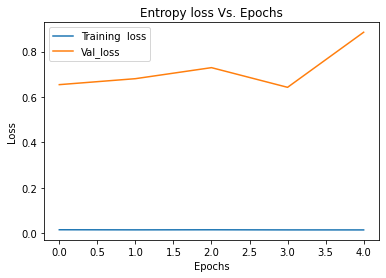

In [ ]:
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Entropy loss Vs. Epochs')
plt.legend(['Training  loss', 'Val_loss'])

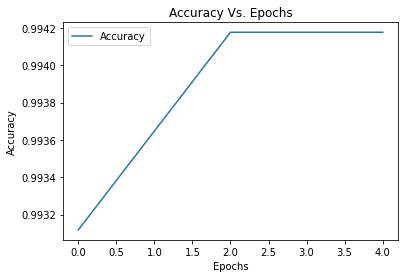

In [ ]:
plt.plot(epochs_hist.history['accuracy'])

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Vs. Epochs')
plt.legend(['Accuracy'])

In [ ]:
# Case 1:  make prediction on training data
y_train_predict = feedback_classifier.predict(X_train)

In [ ]:
# setting threshold value of 0.5 into '1' & '0'
y_train_predict = (X_train_predict > 0.5)

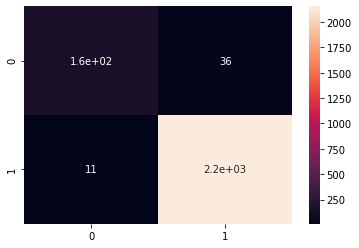

In [ ]:
# build confusion matrix based on training data 

cm = confusion_matrix(y_train, y_train_predict )
sns.heatmap(cm, annot= True)

In [ ]:
print(f'Accuracy: {accuracy_score(y_train, y_train_predict)} \n {classification_report(y_train,y_train_predict)}')


Accuracy: 0.9801016088060965 
               precision    recall  f1-score   support

           0       0.94      0.82      0.87       196
           1       0.98      0.99      0.99      2166

    accuracy                           0.98      2362
   macro avg       0.96      0.91      0.93      2362
weighted avg       0.98      0.98      0.98      2362



In [ ]:
# Case 2 : Make prediction on test data 
y_test_predict = feedback_classifier.predict(X_test)

In [ ]:
y_test_predict = (y_test_predict > 0.5)

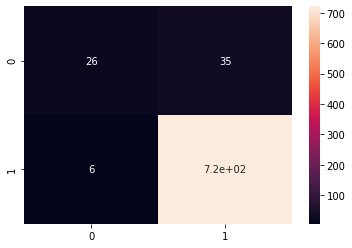

In [ ]:
cm = confusion_matrix(y_test, y_test_predict)
sns.heatmap(cm, annot = True)

In [ ]:
print(f'Accuracy: {accuracy_score(y_test, y_test_predict)} \n {classification_report(y_train,y_train_predict)}')


Accuracy: 0.9479695431472082 
               precision    recall  f1-score   support

           0       0.94      0.82      0.87       196
           1       0.98      0.99      0.99      2166

    accuracy                           0.98      2362
   macro avg       0.96      0.91      0.93      2362
weighted avg       0.98      0.98      0.98      2362

